In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
title_font = {'family':'arial','color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family':'arial','color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
titanic_survival=pd.read_csv('C:/Users/Hp/Downloads/train_titanic.csv')

In [3]:
titanic_survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_survival.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_survival.drop("Cabin",axis=1,inplace=True)

In [6]:
titanic_survival.dropna(inplace=True)

In [8]:
len(titanic_survival)

712

In [9]:
titanic_survival.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
titanic_survival['Age'] = titanic_survival['Age'].astype("int")

In [16]:
i=0
for col in titanic_survival.columns:
    if (col != 'Name' and col!='Ticket'):
        if titanic_survival[col].dtype==object:
            print(col)
            col=titanic_survival[col].unique()
            print(col)
            i+=1
print(i)     

Sex
['male' 'female']
Embarked
['S' 'C' 'Q']
2


In [17]:
labelencoder=LabelEncoder()
titanic_survival['Sex']=labelencoder.fit_transform(titanic_survival['Sex'])
titanic_survival['Embarked']=labelencoder.fit_transform(titanic_survival['Embarked'])

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs',multi_class="ovr")

In [22]:
titanic_numeric=titanic_survival.select_dtypes(exclude='object')

In [32]:
titanic_numeric

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39,0,5,29.1250,1
886,887,0,2,1,27,0,0,13.0000,2
887,888,1,1,0,19,0,0,30.0000,2
889,890,1,1,1,26,0,0,30.0000,0


In [54]:
titanic_numeric=titanic_survival.select_dtypes(exclude='object')

In [55]:
my_x=titanic_numeric.values

In [56]:
len(titanic_numeric.columns)

9

In [57]:
my_x = StandardScaler().fit_transform(titanic_numeric)
pca = PCA(n_components=9)
principalComponents=pca.fit_transform(my_x)

In [58]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.24924242 0.1963238  0.12486715 0.11045457 0.10065517 0.07473402
 0.06130183 0.04737692 0.03504411]
[ 24.92  44.55  57.04  68.09  78.16  85.63  91.76  96.5  100.  ]


Text(0, 0.5, '% of Variance Explained')

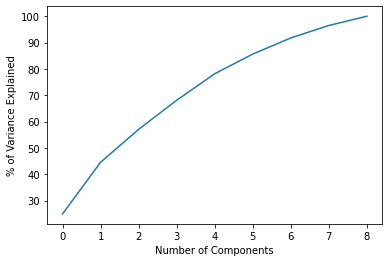

In [59]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

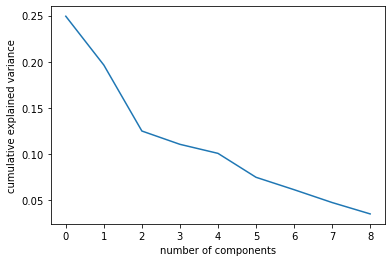

In [60]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

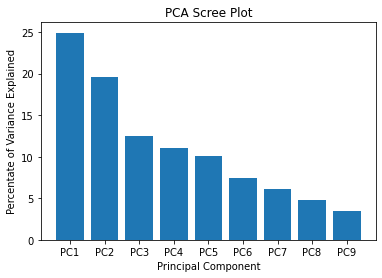

In [62]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
plt.bar(x= range(1,10), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [63]:
x = pd.DataFrame(my_x, columns=titanic_numeric.columns)

In [64]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

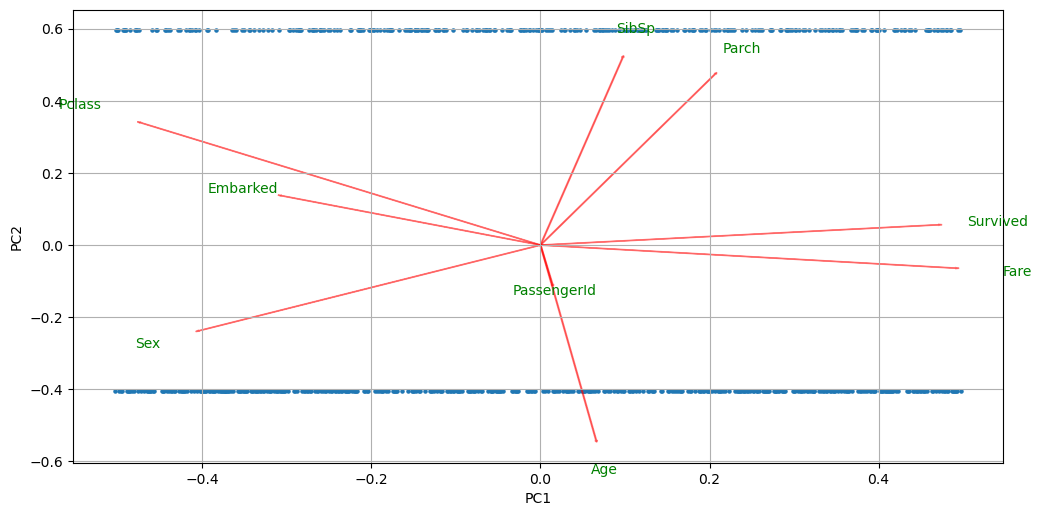

In [65]:
myplot(np.array(x)[:,0:2],np.transpose(pca.components_[0:2, :]),list(x.columns))
plt.show()

In [66]:
X=titanic_survival[["Pclass","Sex","Age","SibSp","Parch","Fare"]]

In [67]:
y=titanic_survival["Survived"]

In [68]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.10, random_state=111)

In [69]:
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [70]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.81
Accuracy on Test Data  : 0.81


In [71]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)

train_accuracy = log_reg_mnm.score(X_train, y_train)
test_accuracy = log_reg_mnm.score(X_test, y_test)

train_prediction=log_reg_mnm.predict(X_train)
test_prediction=log_reg_mnm.predict(X_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.81


In [72]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.679688,0.666667
1,0.010,0.781250,0.777778
2,0.100,0.807813,0.805556
3,1.000,0.804688,0.805556
4,10.000,0.803125,0.805556
5,100.000,0.803125,0.805556
6,1000.000,0.803125,0.805556


I tried subtracting or adding some variables and this is the most accurate model i found.